In [45]:
from wfa.ml_logic import model 
from wfa.utils.image_viz import plot_classified_images
from wfa.utils.get_new_images import get_new_image, split_tiles, address_to_coord
from tensorflow.keras import models

[autoreload of wfa.utils.get_new_images failed: Traceback (most recent call last):
  File "/home/pablo.knecht/.pyenv/versions/3.10.6/envs/watching-from-above/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/home/pablo.knecht/.pyenv/versions/3.10.6/envs/watching-from-above/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/home/pablo.knecht/.pyenv/versions/3.10.6/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/pablo.knecht/code/pabloknecht/watching-from-above/wfa/utils/get_new_images.py", line 9, in <module>
    import regex as re
ModuleNotFoundError: No modul

In [46]:
adr = '-5.426572, -65.833927'
year1 = '2018' 
year2 = '2020'

In [47]:
new_img1 = get_new_image(adr, year1)
new_img2 = get_new_image(adr, year2)

In [48]:
loaded_model = models.load_model('../models/my_model');

In [49]:
X_test1 = split_tiles(new_img1)
X_test2 = split_tiles(new_img2)

In [50]:
cat_pred1 = model.predict_new_images(loaded_model, X_test1);
cat_pred2 = model.predict_new_images(loaded_model, X_test2);

4/4 [==============================] - 0s 18ms/step


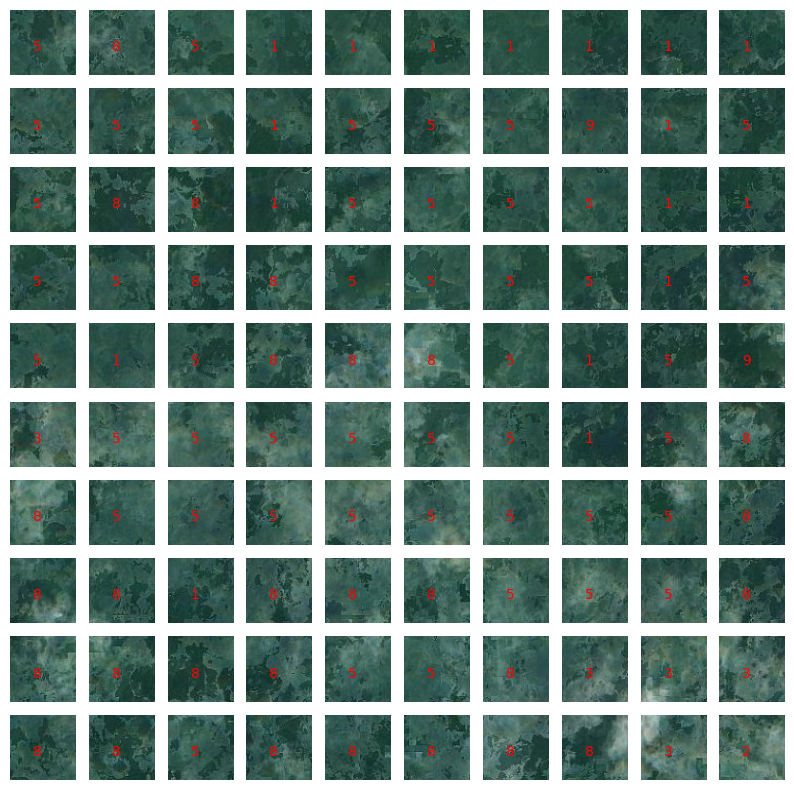

In [51]:
plot_classified_images(X_test1, cat_pred1)

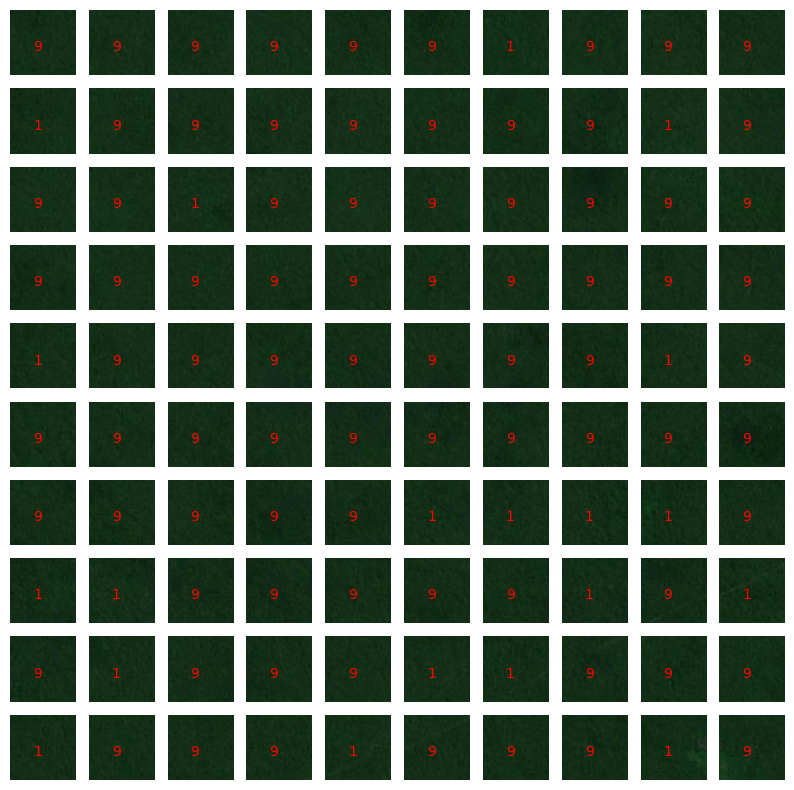

In [52]:
plot_classified_images(X_test2, cat_pred2)